In [34]:
#standard ds imports
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
import scipy.stats as stats
from pydataset import data

#custom imports
from env import create_url
import os

# Hypothesis Testing Overview: Exercises
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
\
\
$H_0$: There is no difference between the network latency now and the network latency before switching internet service provider.\
$H_a$: There is a difference between the network latency now and the network latency before switching internet service provider.
- true positive: There was a difference in network latency between now and previously in both our sample and the population.
- true negative: There was no difference in network latency between now and previously for either our sample or the population.
- type I: We rejected the null hypothesis and found a difference in latency in our sample, however there was no difference in the population.
 - type II: We failed to reject the null hypothesis and found no latency difference in our sample, however there was a difference in the population.

Is the website redesign any good? 
\
\
$H_0$: There is no difference or no increase in user preference between the old website and new.\
$H_a$: There is a measurable increase in user preference between the old website and new.
- true positive: We said there was an increase and there was.
- true negative: We said there was no change or less and it did not increase.
- type I: We said there was an increase, but there was not.
- type II: We said there was no increase, but there was.

Is our television ad driving more sales?
\
\
$H_0$: There is no difference in sales or less after our television ad.\
$H_a$: There is an increase in sales after our television and was run.
- true positive: We said sales increased and they did.
- true negative: We said there was no increase and there was not.
- type I: We said that sales increased, but they did not.
- type II: We said sales increased, but they did.



# Correlation: Exercises

## 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?\
ANSWER: Pearson's R 
- Does smoking affect when or not someone has lung cancer?\
ANSWER: Chi-Squared
- Is gender independent of a person’s blood type?\
ANSWER: Chi-Squared
- Does whether or not a person has a cat or dog affect whether they live in an apartment?\
ANSWER: Chi-Squared
- Does the length of time of the lecture correlate with a student's grade?\
ANSWER: Pearson's R

## 2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [35]:
# Write SQL query
query = '''
SELECT *
FROM customers
'''
# Create connection url
my_url = create_url('telco_churn')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

Step-by-Step:

1. State our hypothesis, set alpha value
2. Select the data, run .info
3. Plot the data
4. Test for assumptions: Is there normality?
5. Run stats test
6. Draw Conclusions

### Does tenure correlate with monthly charges?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and monthly charges.\
$H_a$: There is a linear correlation between tenure and monthly charges.

In [36]:
# Step 1: set alpha
alpha = 0.05

In [37]:
# Step 2: select data, run .info
charges_df = df[['monthly_charges', 'tenure']]
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


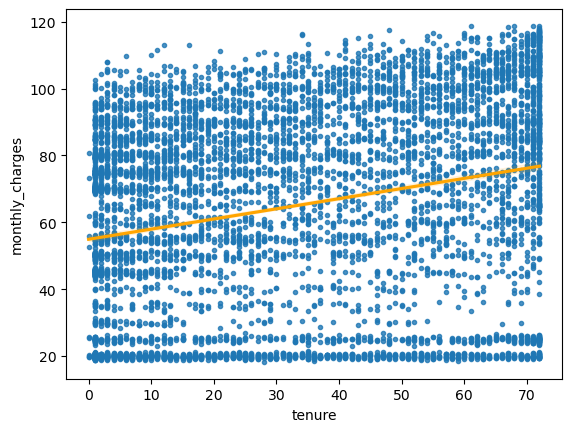

In [38]:
# Step 3: Plot Data

#tenure vs monthly charges
sns.regplot(x='tenure', y='monthly_charges', data= charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

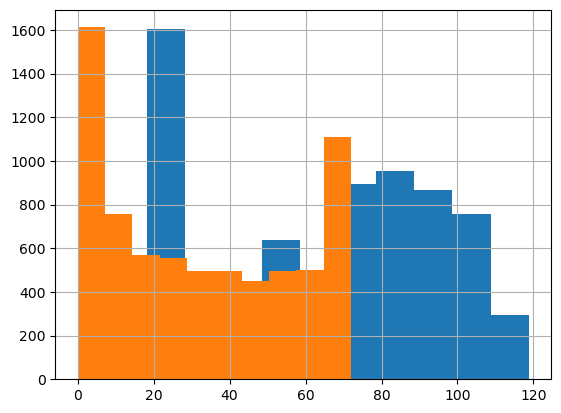

In [39]:
# Step 4: Test for Assumptions (distributions)

# visual test of distribution for monthly charges
charges_df.monthly_charges.hist()

# visual test of distribution for tenure
charges_df.tenure.hist()

plt.show()

In [40]:
#create a new function to check for normal distribution
def eval_dist(r, p, alpha=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > alpha:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [41]:
# Use a Shapiro Test to confirm normalcy.
from scipy.stats import shapiro

In [42]:
# for monthly_charges

# get r and p from stats.shapiro
r,p = stats.shapiro(df.monthly_charges)
print(r,p)

# use created function to evaluate distribution
eval_dist(r,p)

0.9208889007568359 0.0
The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
# for tenure

# get r and p from stats.shapiro
r,p = stats.shapiro(df.tenure)
print(r,p)

# use created function to evaluate distribution
eval_dist(r,p)

0.9037512540817261 0.0
The data is NOT normally distributed


Because tenure and monthly charges are NOT normally distributed, we annot use Pearson's R, but instead use Spearman's R.

In [44]:
# Step 5: Run stats tests
sr, sp = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
sr, sp

(0.27641678933130215, 1.0271266876409408e-123)

In [45]:
# Step 6: Draw Conclusions


# create another function to evaluate the distribution when using a Spearman's R.
def eval_Sresult(r, p, alpha=0.05):
    '''
    This function evaluates our null hypothesis when using a Spearman's R Test
    '''
    if p < alpha:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman's r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman's r: {r:2f}
P-value: {p}""")

In [46]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.276417
P-value: 1.0271266876409408e-123


### Total charges?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and total charges.\
$H_a$: There is a linear correlation between tenure and total charges.

In [47]:
# Step 1: set alpha
alpha = 0.05

In [48]:
# Step 2: Select data and run .info

# create dataframe for tenure and total charges
ttl_charges_df = df[['tenure', 'total_charges']]

# look at df.info()
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [49]:
# I need to clean my data to change object type'O' to float
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/kj/13f127m163l12181fcrgh1vm0000gn/T/ipykernel_11187/3715531691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


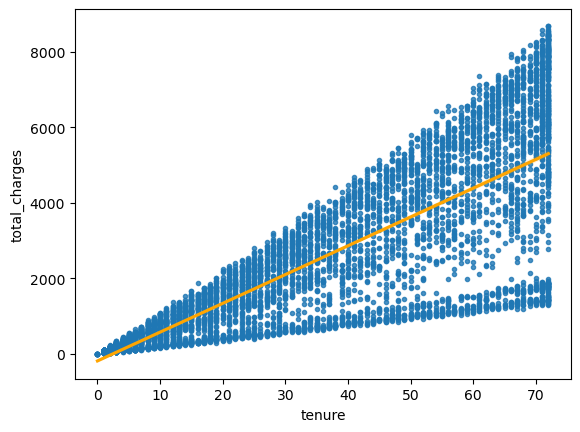

In [50]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

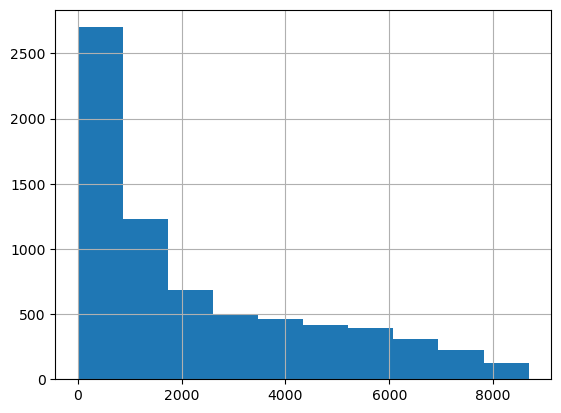

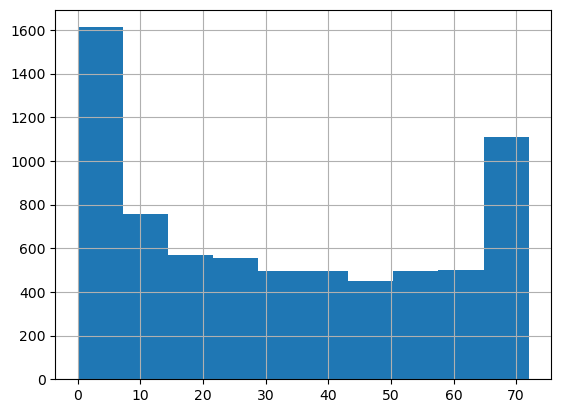

In [51]:
# Step 4: Test for Assumptions (distributions)

# total charges distribution
ttl_charges_df.total_charges.hist()
plt.show()

# tenure distribution
ttl_charges_df.tenure.hist()
plt.show()

In [52]:
# get r and p for total_charges to evaluate distribution
r, p = stats.shapiro(ttl_charges_df.total_charges)
print(r, p)

0.8601521253585815 0.0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
eval_dist(r,p)

The data is NOT normally distributed


In [54]:
# Step 5: Run stats tests

# Because our features are NOT normally distributed we must use Spearman's.
sr, sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr, sp

(0.8896957900597577, 0.0)

In [55]:
# Step 6: Draw Conclusions
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.889696
P-value: 0.0


### What happens if you control for phone and internet service?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and monthly charges of phone and internet customers.\
$H_a$: There is a linear correlation between tenure and monthly charges of phone and internet customers.

In [56]:
# Step 1: Set alpha level
alpha = 0.05

In [57]:
# Step 2: Select data and run .info()

# create a df of only customers that have internet service type 1 and phone service
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['monthly_charges','tenure']]
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


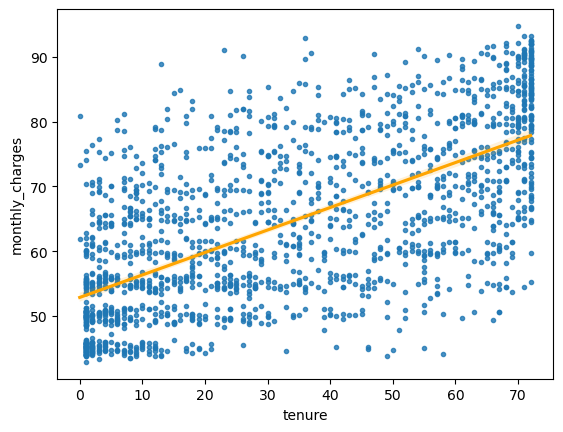

In [58]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

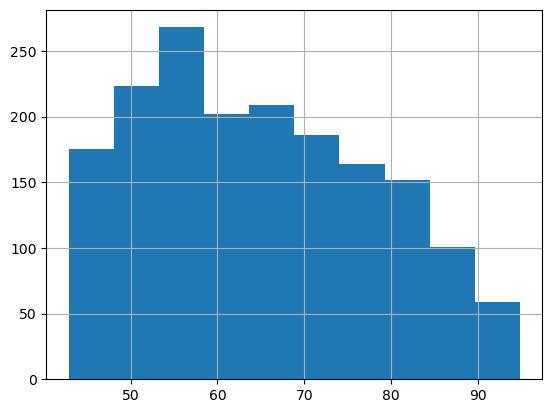

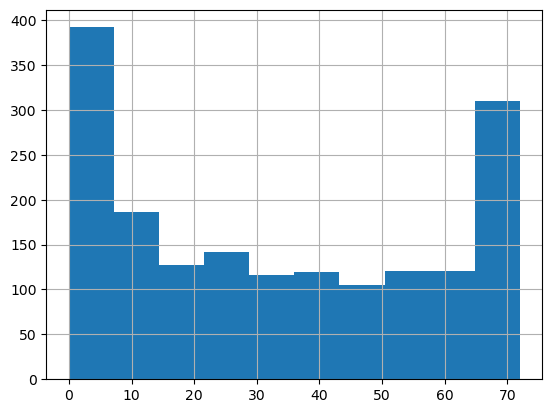

In [59]:
# Step 4: Test for Assumptions (distributions)

# monthly charges
phone_df.monthly_charges.hist()
plt.show()

# tenure
phone_df.tenure.hist()
plt.show()

In [60]:
# MONTHLY CHARGES distribution evaluation
# get r and p with stats.shapiro
r,p = stats.shapiro(phone_df.monthly_charges)
print(r,p)

# evaluate distribution with created function
eval_dist(r,p)

0.9584369659423828 7.019588771857106e-22
The data is NOT normally distributed


In [61]:
# TENURE distribution evaluation
# get r and p with stats.shapiro
r,p = stats.shapiro(phone_df.tenure)
print(r,p)

# evaluate distribution with created function
eval_dist(r,p)

0.8991788029670715 2.3523856297437335e-32
The data is NOT normally distributed


In [62]:
# Step 5: Run stats tests
sr, sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr, sp

(0.6644708508462759, 5.423601644635052e-222)

In [63]:
# Step 6: Draw Conclusions
eval_Sresult(sr, sp)


# There is a moderate-strong positive correlation between tenure and monthly charges for customers that have both phone and internet service.

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.664471
P-value: 5.423601644635052e-222


#### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [64]:
# Connect to employees database

# Write SQL query
query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01'
'''
# Create connection url
my_url = create_url('employees')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

In [65]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB
None


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


Step 1: State Hypothesis:\
$H_0$: There is no correlation between salary and tenure.\
$H_a$: There is a correlation between salary and tenure.

In [66]:
# Step 1: set alpha
alpha = 0.05

In [67]:
# Step 2: Select Data and run .info()
# get tenure by subtracting hire_date from to_date
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [68]:
# clean data and create tenure column
(df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)

# create tenure column
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)[0]
# change to 'int'
df.tenure = df.tenure.astype(int)
# create new df with just tenure and salary
tenure_df = df[['tenure', 'salary']]

tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  240124 non-null  int64
 1   salary  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


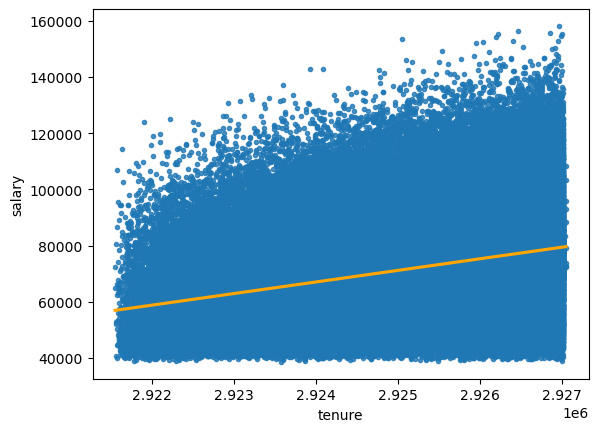

In [69]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

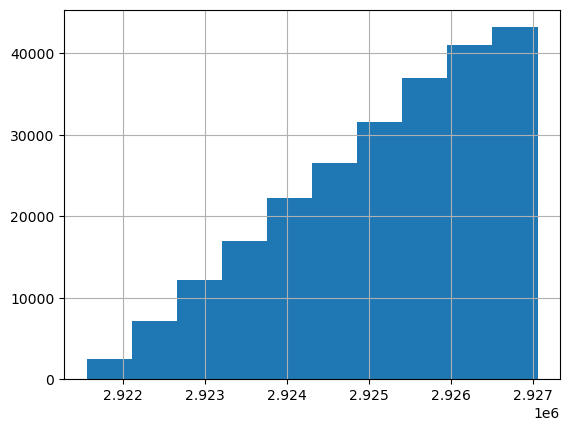

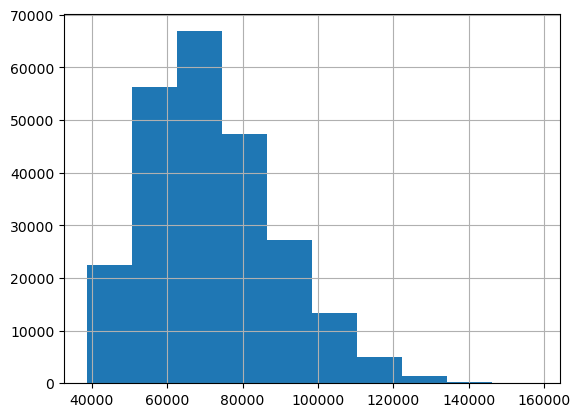

In [70]:
# Step 4: Test for Assumptions (distributions)
#distribution for tenure
tenure_df.tenure.hist()
plt.show()

#distribution for salary
tenure_df.salary.hist()
plt.show()

In [71]:
# for tenure use shapiro to find r and p. Then evaluate the distribution
r, p = stats.shapiro(tenure_df.tenure)
eval_dist(r,p)

The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [72]:
# for salary use shapiro to find r and p. Then evalue the distribution
r, p = stats.shapiro(tenure_df.salary)
eval_dist(r,p)

The data is NOT normally distributed


In [73]:
# Step 5: Run stats tests

# because it's not normally distributed, use Spearman
sr, sp = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
sr, sp

(0.3128783525010577, 0.0)

In [74]:
# Step 6: Draw Conclusions
eval_Sresult(sr, sp)

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.312878
P-value: 0.0


##### - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Step 1: State Hypothesis:\
$H_0$: There is no correlation between tenure and number of titles.\
$H_a$: There is a correlation between tenure and number of titles.

In [75]:
# Set alpha
alpha = 0.05

In [76]:
# Step 2: Select data and run.info

# SQL query
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''
# Create connection url
my_url = create_url('employees')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

In [77]:
# create dataframe with only number of titles and tenure
df = df[['num_titles', 'tenure']]

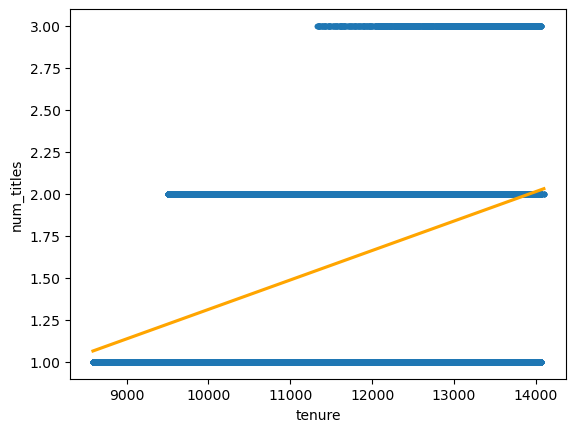

In [78]:
# Step 3: Plot the data
#plot tenure and number of titles
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [79]:
# Step 4: Test for Assumptions (distributions)
'''
- Do we have equal variance?
- are there enough observations?
- are they independent of each other?
'''

'\n- Do we have equal variance?\n- are there enough observations?\n- are they independent of each other?\n'

In [80]:
# oberservations?
df.num_titles.value_counts()

num_titles
2    125345
1    111892
3      2887
Name: count, dtype: int64

In [81]:
# variance? use Levene's Test to Test the assumption of equal variance of spending score for the 2 groups.
stats.levene(df.num_titles, df.tenure)
# because the variances are significantly different, we will use the Kruskal Wallis test.

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [82]:
# Step 5: Run stats tests

# Because we are using Kruskal Wallis we need new hypothesis

$H_0$: The median is the same for the various number of titles.\
$H_a$: The median is not equal for the various number of titles.

In [83]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<Axes: title={'center': 'tenure'}, xlabel='num_titles'>

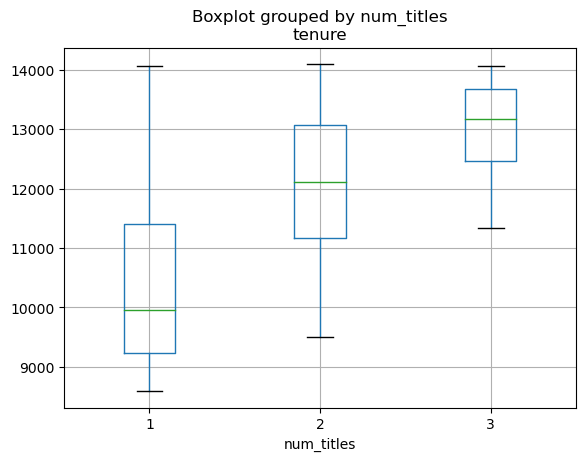

In [84]:
# Step 6: Draw Conclusions
df.boxplot('tenure', by='num_titles')

#### 4. Use the sleepstudy data
Is there a relationship between days and reaction time?


In [85]:
sleep_df = data('sleepstudy')

Step 1: Form hypotheses:\
$H_0$: There is no correlation between days and reaction time.\
$H_a$: There is a correlation between days and reaction time.

In [86]:
# set alpha
alpha = 0.05

In [87]:
# Step 2: Select data and run .info
react_df = sleep_df[['Reaction', 'Days']]
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


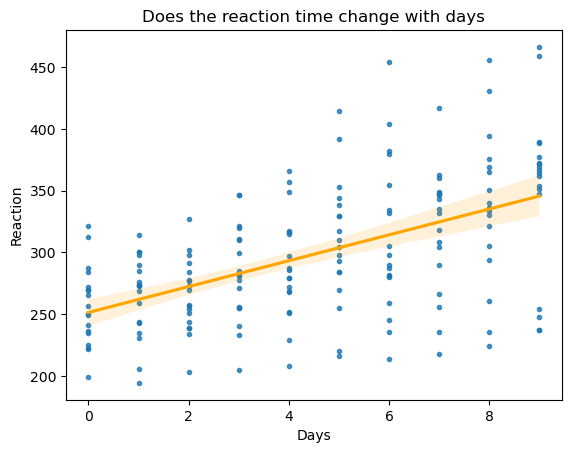

In [88]:
# Step 3: Plot data
#plot relationships
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.title('Does the reaction time change with days')
plt.show()

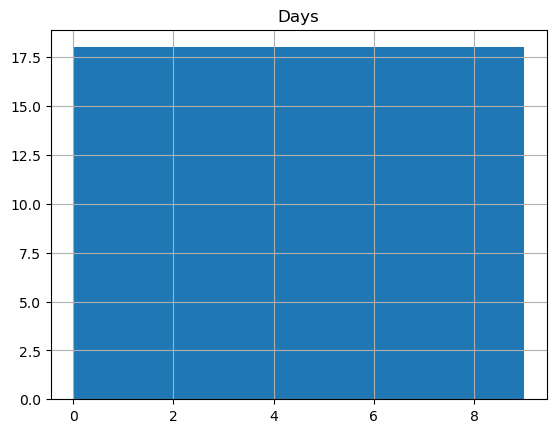

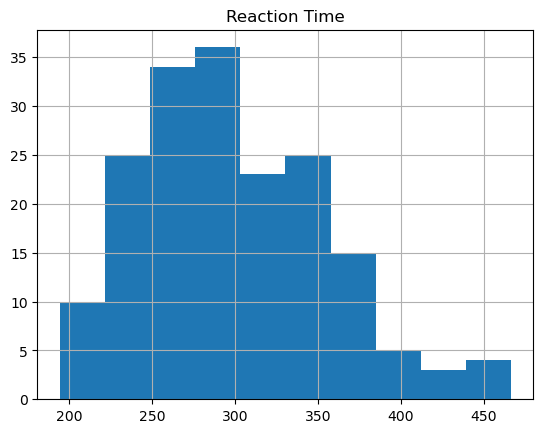

In [89]:
# Step 4: Test for Assumptions (distributions)
#distribution of days
react_df.Days.hist()
plt.title('Days')
plt.show()

#distribution of reaction time
react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [90]:
# Step 5: Run test stats
# Use Spearman because both are not normally distributed
sr, sp = stats.spearmanr(react_df.Days, react_df.Reaction)
sr,sp

(0.5228138502259547, 5.132878057706873e-14)

In [91]:
# Step 6: Draw Conclusions
eval_Sresult(sr, sp)
# With an r of -.52, there is a moderate positive correlation between days and reaction time.

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.522814
P-value: 5.132878057706873e-14


# Comparison of Means: Exercises

#### 1. Answer with the type of test you would use (assume normal distribution):

 - Is there a difference in grades of students on the second floor compared to grades of all students?\
 ANSWER: 1 sample, 2 tailed T-TEST
 - Are adults who drink milk taller than adults who don't drink milk?\
 ANSWER: 2 sample, 1-tailed T-TEST
 - Is the price of gas higher in Texas or in New Mexico?\
 ANSWER: 2 sample, 1-tailed T-TEST
 - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?\
 ANSWER: ANOVA

#### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.\
ANSWER: We reject the null hypothesis. There is a significant difference between groups.\
\
We will use a 2 sample, 2-tailed t-test.
\
\
Step 1: Form hypotheses:\
$H_0$: The mean time it takes to sell a home in office 1 = the mean time it takes to sell a home in office 2.\
$H_a$: The mean time it takes to sell a home in office 1 != the mean time it takes to sell a home in office 2.

In [92]:
# set alpha
alpha = 0.05

In [93]:
# Calculate the approprate test statistics and p-value
# use stats.ttest_ind_from_stats: A T-test for means of two independent samples from descriptive statistics.

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, alternative='two-sided')
t, p

(-2.6252287036468456, 0.01020985244923939)

In [94]:
# Conclude based on test statistics
print("Reject null hypothesis? ", p < alpha)

Reject null hypothesis?  True


#### 3. Load the mpg dataset and use it to answer the following questions:

 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
 - Are compact cars more fuel-efficient than the average car?
 - Do manual cars get better gas mileage than automatic cars?

In [95]:
mpg = data('mpg')

We will do a 2 sample 2-tailed T-test.\
\
Step 1: Form hypotheses:\
$H_0$: The mean fuel-efficiency for cars made in 2008 = the mean fuel-efficiency for cars made in 1999.\
$H_a$: The mean fuel-efficiency for cars made in 2008 != the mean fuel-efficiency for cars made in 1999. 

In [96]:
# set alpha
alpha = 0.05

In [128]:
# Add column to average cty and hwy mileage
mpg['mileage'] = stats.hmean((mpg.cty, mpg.hwy))
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto_transmission,mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,1,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,1,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0,21.272727


In [98]:
# select data
mpg_1999 = mpg.mileage[mpg.year == 1999]
mpg_2008 = mpg.mileage[mpg.year == 2008]

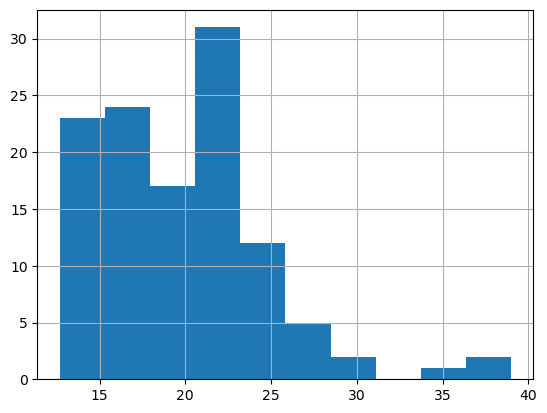

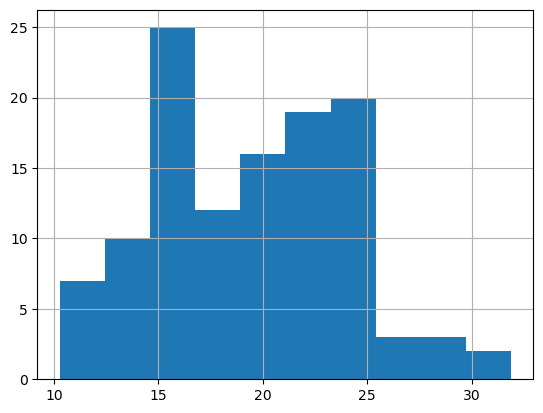

(0.031071867429515194, 0.8602339200830025)

In [99]:
# Step 2: Verify Assumptions
    # Independent Samples? 
        # - Yes. They come from exclusive groups
    # Normal Distribution?
        # - We have 117 samples each. Will assume normal distribution
    # Equal Variences? Use Levene test
        # - We fail to reject the null. Variane is equivalent.

# Distribution for 1999
mpg_1999.hist()
plt.show()
# Distribution for 2008
mpg_2008.hist()
plt.show()

# Variances
lev_stat, p = stats.levene(mpg_1999, mpg_2008)
lev_stat, p

In [100]:
# Step 3: Calculate the appropriate test statistics and p-value
#stats.ttest_ind?
t, p = stats.ttest_ind(mpg_1999, mpg_2008, equal_var=True)
t, p


(0.3011962975077886, 0.7635345888327115)

In [101]:
# Step 4: Conclude based on test statistics
print("Reject null hypothesis? ", p < alpha)


Reject null hypothesis?  False


#####  - Are compact cars more fuel-efficient than the average car?


We will do a 1 sample 1-tailed T-test.\
\
Step 1: Form hypotheses:\
$H_0$: The mean fuel-efficiency for compact cars <= the mean fuel-efficiency of the population.\
$H_a$: The mean fuel-efficiency for compact cars > the mean fuel-efficiency for the population. 

In [102]:
# set alpha
alpha =0.05

In [103]:
mpg['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [129]:
# select sample
compact = mpg[mpg['class'] == 'compact']
compact_mileage = compact.mileage

In [132]:
stats.ttest_1samp?

Signature:
stats.ttest_1samp(
    a,
    popmean,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the T-test for the mean of ONE group of scores.

This is a test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.

Parameters
----------
a : array_like
    Sample observation.
popmean : float or array_like
    Expected value in null hypothesis. If array_like, then its length along
    `axis` must equal 1, and it must otherwise be broadcastable with `a`.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input 

In [133]:
# find popmean for mileage
μ = mpg.mileage.mean()

In [137]:
t_stat, p = stats.ttest_1samp(compact_mileage, µ)
t_stat, p

(7.512360093161361, 1.5617666348807277e-09)

We can reject our null hypothesis. The fuel efficiency of compact cars is greater than the population mean.

# Comparision of Groups: Exercises

#### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other:

Step 1: Form hypotheses and set alpha:\
$H_0$: Codeup students and mac users are independent.\
$H_a$: Codeup students and mac users are not independent. 

In [108]:
# set alpha
alpha= 0.05

In [109]:
df = pd.DataFrame({'Codeup student': [49,1], 'Not Codeup Students' :[20,30]})
df

,Codeup student,Not Codeup Students
0,49,20
1,1,30


In [110]:
df.index = ['Mac User', 'Not Mac User']
df

,Codeup student,Not Codeup Students
Mac User,49,20
Not Mac User,1,30


In [111]:
chi2, p, degf, expected = stats.chi2_contingency(df)

In [112]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


#### 2. Choose another 2 categorical variables from the mpg dataset.

 - State your null and alternative hypotheses.
 - State your alpha.
 - Perform a chi2 test of independence.
 - State your conclusion

In [113]:
mpg = data('mpg')

##### Categorical Variables: Manufacturer, Transmission type (auto or manual)

Step 1: Form hypotheses and set alpha:\
$H_0$: Transmission type is independent of manufacturer.\
$H_a$: Transmission type is dependent on manufacturer. 

In [114]:
#set alpha
alpha = 0.05

In [115]:
# Step 2: Calculate the appropriate test statistics and p-value

# filter to show transimission types that are either auto or manual
mpg['auto_transmission'] = mpg.trans.str.startswith('auto').astype(int)
observed = pd.crosstab(mpg.manufacturer, mpg.auto_transmission)
observed
# Run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')


Observed Values

[[ 7 11]
 [ 3 16]
 [ 7 30]
 [ 8 17]
 [ 5  4]
 [ 7  7]
 [ 0  8]
 [ 0  4]
 [ 0  3]
 [ 0  4]
 [ 5  8]
 [ 0  5]
 [ 7  7]
 [14 20]
 [14 13]]
---
Expected Values

[[ 5 12]
 [ 6 12]
 [12 24]
 [ 8 16]
 [ 2  6]
 [ 4  9]
 [ 2  5]
 [ 1  2]
 [ 0  2]
 [ 1  2]
 [ 4  8]
 [ 1  3]
 [ 4  9]
 [11 22]
 [ 8 18]]
---

chi^2 = 29.2937
p     = 0.0095


In [116]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


We reject the null hypothesis. There is an association between manufacturer and transmission type.

#### 3. Use the data from the employees database to answer these questions:

 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
 - Is an employee's gender independent of whether or not they are or have been a manager?

Step 1: Form hypotheses and set alpha:\
$H_0$: Working in sales or marketing is independent of employee gender.\
$H_a$: Working in sales or marketing is dependent of employee gender. 

In [117]:
# Connect to database
# Write SQL query
query = '''
SELECT *
FROM employees
LEFT JOIN dept_emp USING (emp_no)
LEFT JOIN departments USING (dept_no)
WHERE to_date = '9999-01-01'
'''
# Create connection url
my_url = create_url('employees')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

In [118]:
# Step 2: Calculate appropriate test statistics and p-value

# Create filters:
gender_filter = df['gender'][(df['dept_name'] == 'Sales') | (df['dept_name'] == 'Marketing')]
dept_filter = df['dept_name'][(df['dept_name'] == 'Sales') | (df['dept_name'] == 'Marketing')]
# Crosstab
observed = pd.crosstab(gender_filter, dept_filter)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [119]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p


0.5691938610810126

In [120]:
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'p-value: {p}')
        print(f'We reject the null hypothesis.')
        print(f'There exists some relationship between {group1} and the {group2}.')
    else:
        print(f'p-value: {p}')
        print(f'We fail to reject the null hypothesis.')
        print(f'There is not a significant relationship between {group1} and {group2}.')


In [121]:
# Step 3: Conclude based on the test statistics.
eval_results(p, alpha, group1=gender_filter, group2=dept_filter)

p-value: 0.5691938610810126
We fail to reject the null hypothesis.
There is not a significant relationship between 1         F
12        M
13        F
32        F
39        M
         ..
240105    M
240108    M
240113    F
240114    F
240117    F
Name: gender, Length: 52543, dtype: object and 1             Sales
12            Sales
13        Marketing
32            Sales
39            Sales
            ...    
240105        Sales
240108        Sales
240113        Sales
240114        Sales
240117    Marketing
Name: dept_name, Length: 52543, dtype: object.


We fail to reject the null hypothesis. Working in sales or marketing is independent of gender.

Step 1: Form hypotheses and set alpha:\
$H_0$: Employee gender is independent of whether or not they have been a manager.\
$H_a$: Employee gender is dependent on whether of not they have been a manager. 

In [122]:
# set alpha:
alpha = 0.05

In [123]:
# Connect to database
# Write SQL query
query = '''
SELECT *
FROM employees
LEFT JOIN dept_emp USING (emp_no)
LEFT JOIN dept_manager USING (emp_no)
'''
# Create connection url
my_url = create_url('employees')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

In [124]:
title_df['is_manager']  title_df.title.str.startswith('Manager')

SyntaxError: invalid syntax (394469873.py, line 1)